In [1]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
from cftime import datetime 
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
jet = mcm.get_cmap('jet')
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
%matplotlib inline 

filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Fe_Fep_Feb.nc"
#filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Na_Nap_Feb.nc"
#filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Mg_Mgp_Feb.nc"

filename2="Nc_Files/Jianfei_WACCMX_files/waccmx_T_Z3_e_Feb.nc"
#filename3="Nc_Files/Jianfei_WACCMX_files/waccmx_winds_Feb.nc"

M = filename[-10:]
Metal=M[0:2]
#print(Metal)

ds = xr.open_dataset(filename)
ds2 = xr.open_dataset(filename2)
#ds2
#ds

In [2]:
time = ds.variables['time']
times = xr.cftime_range(start="0001-02-01", periods=672, freq="1H", calendar="noleap")
times2 = ds["time"].dt.strftime("%Y%m%d %H:%M")
times3 = ds["time"].dt.strftime("%Y%m%d")

#times
#times2
#times3

In [3]:
lon = ds.variables['lon']
lat = ds.variables['lat']
lev = ds.variables['lev']

#M = ds.variables[str(Metal)]
#Mp = ds.variables[str(Metal)+'p']

dst = ds.transpose("lev", ...)
Mt = dst.variables[str(Metal)]
Mpt = dst.variables[str(Metal)+'p']

#Mt[:,1,1,1]
#lev
#dst
#geopH[-1,1,1,1]
#temp
#lat

In [4]:
ds2t = ds2.transpose("lev", ...)
temp = ds2t.variables['T']
elect = ds2t.variables['e']

geopH = ds2t.variables['Z3'] / 1000 #m-> km
Zavg = geopH.mean(('time','lat', 'lon'))

Mtdens = ( Mt * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)
Mptdens = ( Mpt * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)
edens = ( elect * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)

#Mtdens2 = Mtdens / 1000 # convert to 10^3 cm-3
#Mptdens2 = Mptdens / 1000 # convert to 10^3 cm-3

In [5]:
#Sets up lev / alt axes

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

lowest_p = 1*10**-2
highest_p = 5*10**-6

low_ylim_idx = find_nearest(lev, lowest_p)
high_ylim_idx = find_nearest(lev, highest_p)

y_lims = [lev[low_ylim_idx], lev[high_ylim_idx]]

In [24]:
#-------------------Plot set up for plot 2: SpEs_plot5 -----------------------------
#--------------SpEs as a function of local time (one day in hrs) and altitude-------------------

#Location 1
#lat_plot5_idx = 36#(-21.8)
#lon_plot5_idx = 54#(135 lon)

#Location 2
#lat_plot5_idx = 37#(-19.9)     
#lon_plot5_idx = 87#(217.5) 

#Location 3
#lat_plot5_idx = 23#(-46.4)
#lon_plot5_idx = 117#(292.5)

#Location 4
#lat_plot5_idx = 8#(-74.8)   
#lon_plot5_idx = 54#(135 lon)

#Location 5
#lat_plot5_idx = 18#(-55.9)
#lon_plot5_idx = 62#(155 lon)


#Location 6
lat_plot5_idx = 49#(2.8)
lon_plot5_idx = 95#(237.5 lon)


#37#(-19.9)

#Location -
#lat_plot2_idx = 47 #(-0.9) 
#lon_plot2_idx = 132#(330)

In [25]:
#-------------------Plot set up for plot 5-----------------------------
#--------------e density over (~ -20'N lat, ~ -135' lon (= 225)) as a function of local time (one day in hrs) and altitude-------------------

#lat_plot5_idx = 23#(-46.4)       37#(-19.9)   #36#(-21.8)  8#(-74.8)        
#lon_plot5_idx = 117#(292.5)     87#(217.5)    54#(135 lon)   

tim_plot5_idx_min = 0
tim_plot5_idx_max = 24

lat_plot5_ind = lat[lat_plot5_idx] #-19.8'N
lat_plot5_str = str("%.1f" % lat_plot5_ind)
print('Plot lat = ' + lat_plot5_str)

lon_plot5_ind = lon[lon_plot5_idx] 
lon_plot5_str = str("%.1f" % lon_plot5_ind)
print('Plot lon = ' + lon_plot5_str)

tim_plot5_ind_min = times[tim_plot5_idx_min] 
tim_plot5_ind_max = times[tim_plot5_idx_max] 
tim_plot5_ind = times2[tim_plot5_idx_min:tim_plot5_idx_max+1] 
#print(tim_plot5_ind_min)
tim_plot5_str = str(tim_plot5_ind_min) + ' : ' + str(tim_plot5_ind_max)
print('Plot time = ' + tim_plot5_str)

eplot5 = edens[:,tim_plot5_idx_min:tim_plot5_idx_max+1,lat_plot5_idx,lon_plot5_idx] 
Mptplot5 = Mptdens[:,tim_plot5_idx_min:tim_plot5_idx_max+1,lat_plot5_idx,lon_plot5_idx] 
Mtplot5 = Mtdens[:,tim_plot5_idx_min:tim_plot5_idx_max+1,lat_plot5_idx,lon_plot5_idx] 
#eplot5

Plot lat = 2.8
Plot lon = 237.5
Plot time = 0001-02-01 00:00:00 : 0001-02-02 00:00:00


In [26]:
#times_plot4 = times2[0:25]
if lon_plot5_ind > 180.:
    lon_plot5 =  lon_plot5_ind - 360
else:
    lon_plot5 = lon_plot5_ind
 
print(lon_plot5)

timeconv = lon_plot5 / 15
timeconvr = timeconv.round()
timeconvrr = int(timeconvr)
print(timeconvrr)

timeticks = np.linspace( (0) , (24) ,25, dtype=int)
timeticks = np.linspace( (0+timeconvrr) , (24+timeconvrr) ,25, dtype=int)

timeticksar = np.arange(0,25,1)
for x in timeticksar:
    if timeticks[x] < 0:
        timeticks[x] = timeticks[x] + 24
timeticks

<xarray.Variable ()>
array(-122.5)
-8


array([16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16])

/tmp/ipykernel_2729316/725689768.py:32: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,format=ticker.FuncFormatter(fmt),pad=0.12)


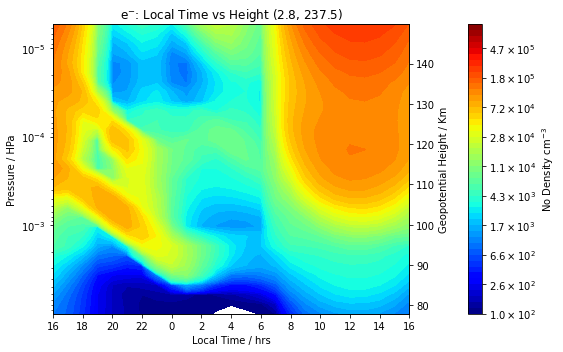

In [27]:
#-------------------Plot 5-----------------------------
#-------------e- Local Time vs Height ------------------

#ticks2 = np.linspace(0, 2.5, num=26) #cm-3
ticks = np.logspace(2, 6, endpoint=True, base=10) 

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(tim_plot5_ind, lev, eplot5, 
                levels=ticks, 
                locator=ticker.LogLocator(),
                #extend='min',
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1]) 

ax.set_xlabel('Local Time / hrs')
ax.set_xticks(np.linspace(0,24,13, dtype=int)) 
ax.set_xticklabels(timeticks[::2])

ax2 = ax.twinx()
ax2.set_ylabel('Geopotential Height / Km')
ax2.set_ylim(Zavg[low_ylim_idx],Zavg[high_ylim_idx])

#------------------
def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

cbar = fig.colorbar(C,format=ticker.FuncFormatter(fmt),pad=0.12)
#-------------------

#cbar = fig.colorbar(C,format='%.0e',pad=0.12)#,ticks=ticks2[::2], pad=0.05)

cbar.set_label(r'No Density cm$^{-3}$')

plt.title('e$^{-}$: Local Time vs Height ('+lat_plot5_str+', '+lon_plot5_str+')')
plt.tight_layout()

figname='e: Local Time vs Height ('+lat_plot5_str+', '+lon_plot5_str+')'+'.png'
plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300)

/tmp/ipykernel_2729316/942210749.py:8: UserWarning: Log scale: values of z <= 0 have been masked
  C = ax.contourf(tim_plot5_ind, lev, Mptplot5,
/tmp/ipykernel_2729316/942210749.py:32: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,format=ticker.FuncFormatter(fmt),pad=0.12)


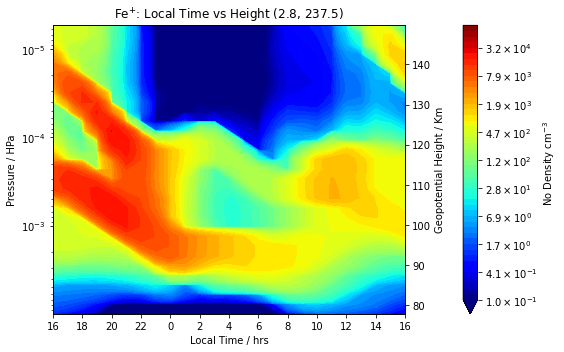

In [28]:
#-------------------Plot 5-----------------------------
#-------------M+ Time vs Height ------------------

#ticks2 = np.linspace(0, 2.5, num=26) #cm-3
ticks = np.logspace(-1, 5, endpoint=True, base=10) 

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(tim_plot5_ind, lev, Mptplot5, 
                levels=ticks, 
                locator=ticker.LogLocator(),
                extend='min',
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1]) 

ax.set_xlabel('Local Time / hrs')
ax.set_xticks(np.linspace(0,24,13, dtype=int)) 
ax.set_xticklabels(timeticks[::2])

ax2 = ax.twinx()
ax2.set_ylabel('Geopotential Height / Km')
ax2.set_ylim(Zavg[low_ylim_idx],Zavg[high_ylim_idx])

#------------------
def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

cbar = fig.colorbar(C,format=ticker.FuncFormatter(fmt),pad=0.12)
#-------------------

#cbar = fig.colorbar(C,format='%.0e',pad=0.12)#,ticks=ticks2[::2], pad=0.05)

cbar.set_label(r'No Density cm$^{-3}$')

plt.title(str(Metal)+'$^{+}$: Local Time vs Height ('+lat_plot5_str+', '+lon_plot5_str+')')
plt.tight_layout()

figname=str(Metal)+'p: Local Time vs Height ('+lat_plot5_str+', '+lon_plot5_str+')'+'.png'
plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300)

/tmp/ipykernel_2729316/68534169.py:32: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,format=ticker.FuncFormatter(fmt),pad=0.12)


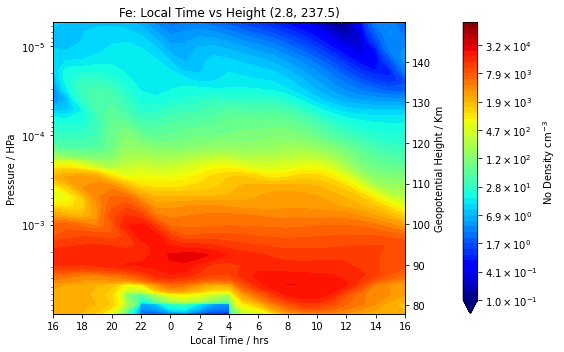

In [29]:
#-------------------Plot 5-----------------------------
#-------------M Time vs Height ------------------

#ticks2 = np.linspace(0, 2.5, num=26) #cm-3
ticks = np.logspace(-1, 5, endpoint=True, base=10) 

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(tim_plot5_ind, lev, Mtplot5, 
                levels=ticks, 
                locator=ticker.LogLocator(),
                extend='min',
                cmap=jet)

ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1]) 

ax.set_xlabel('Local Time / hrs')
ax.set_xticks(np.linspace(0,24,13, dtype=int)) 
ax.set_xticklabels(timeticks[::2])

ax2 = ax.twinx()
ax2.set_ylabel('Geopotential Height / Km')
ax2.set_ylim(Zavg[low_ylim_idx],Zavg[high_ylim_idx])

#------------------
def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

cbar = fig.colorbar(C,format=ticker.FuncFormatter(fmt),pad=0.12)
#-------------------

#cbar = fig.colorbar(C,format='%.0e',pad=0.12)#,ticks=ticks2[::2], pad=0.05)

cbar.set_label(r'No Density cm$^{-3}$')

plt.title(str(Metal)+': Local Time vs Height ('+lat_plot5_str+', '+lon_plot5_str+')')
plt.tight_layout()

figname=str(Metal)+': Local Time vs Height ('+lat_plot5_str+', '+lon_plot5_str+')'+'.png'
plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300)